<a href="https://colab.research.google.com/github/drishtiiii/Brain-Tumor-Detection-VGG16-Model/blob/main/Brain_tumorDetection_using_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/archive_31.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
import keras,os
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator


import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt

In [5]:
path = "/content/archive_3"

train_generator = ImageDataGenerator(
    rescale=1./255, 
    horizontal_flip=2, 
    vertical_flip=2)
image_generator = ImageDataGenerator(
    rescale=1./255, 
    horizontal_flip=2, 
    vertical_flip=2, 
    validation_split=0.5)    
dir1='/content/archive_3/train'
training_set = train_generator.flow_from_directory(batch_size=16,
                                                 directory=dir1,
                                                 shuffle=True,
                                                 target_size=(224,224), 
                                                 subset="training",
                                                 color_mode='rgb',
                                                 class_mode='binary')

dir2='/content/archive_3/validation'
validation_set = image_generator.flow_from_directory(batch_size=16,
                                                 directory=dir2,
                                                 shuffle=True,
                                                 target_size=(224,224), 
                                                 subset="validation",
                                                 color_mode='rgb',
                                                 class_mode='binary')
     

Found 1792 images belonging to 2 classes.
Found 604 images belonging to 2 classes.


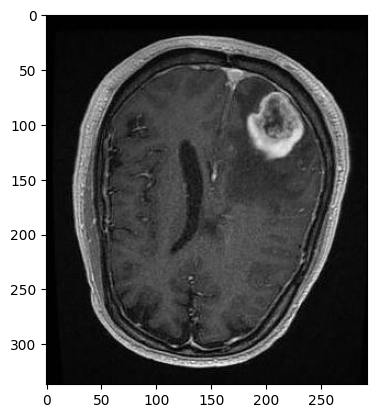

In [6]:

from cv2 import imread
yes_path = dir1+"/yes/"+os.listdir(dir1+"/yes/")[4]
tumour = imread(yes_path)
plt.imshow(tumour)

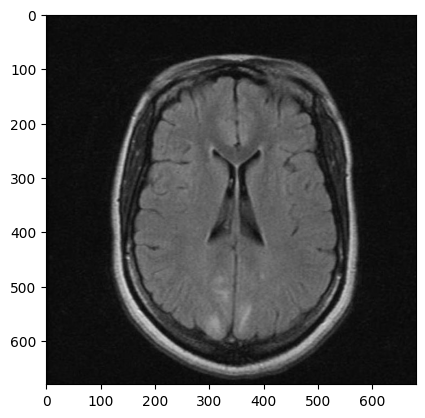

In [7]:

no_path = dir2+"/no/"+os.listdir(dir2+"/no/")[4]
tumour = imread(no_path)
plt.imshow(tumour)

In [8]:
training_set.class_indices
     

{'no': 0, 'yes': 1}

In [9]:
model = VGG16(
      input_shape = (224,224,3),
      include_top = False,
      
    )

     
for layers in model.layers:
    layers.trainable = False
    
x = Flatten()(model.output)
x = Dropout(0.4)(x)

x = Dense(256, activation='relu')(x)
x = Dense(1, activation = "sigmoid")(x)
model = keras.Model(model.input, x)


58889256/58889256 [==============================] - 4s 0us/step


In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
hist = model.fit_generator(training_set,validation_data = validation_set, epochs = 70)

Epoch 1/70
112/112 [==============================] - 24s 120ms/step - loss: 0.5287 - accuracy: 0.8158 - val_loss: 0.1945 - val_accuracy: 0.9272
Epoch 2/70
112/112 [==============================] - 11s 100ms/step - loss: 0.1393 - accuracy: 0.9537 - val_loss: 0.2472 - val_accuracy: 0.9023
Epoch 3/70
112/112 [==============================] - 12s 106ms/step - loss: 0.1189 - accuracy: 0.9548 - val_loss: 0.1374 - val_accuracy: 0.9487
Epoch 4/70
112/112 [==============================] - 12s 102ms/step - loss: 0.0819 - accuracy: 0.9710 - val_loss: 0.0924 - val_accuracy: 0.9652
Epoch 5/70
112/112 [==============================] - 11s 102ms/step - loss: 0.0831 - accuracy: 0.9654 - val_loss: 0.2398 - val_accuracy: 0.9056
Epoch 6/70
112/112 [==============================] - 11s 101ms/step - loss: 0.0465 - accuracy: 0.9833 - val_loss: 0.1504 - val_accuracy: 0.9421
Epoch 7/70
112/112 [==============================] - 13s 118ms/step - loss: 0.0485 - accuracy: 0.9816 - val_loss: 0.0300 - val_ac

In [13]:
hist = hist.history

In [15]:

model.evaluate(validation_set )

38/38 [==============================] - 5s 121ms/step - loss: 0.0749 - accuracy: 0.9818


[0.07494472712278366, 0.9817880988121033]

Text(0, 0.5, 'accuracy')

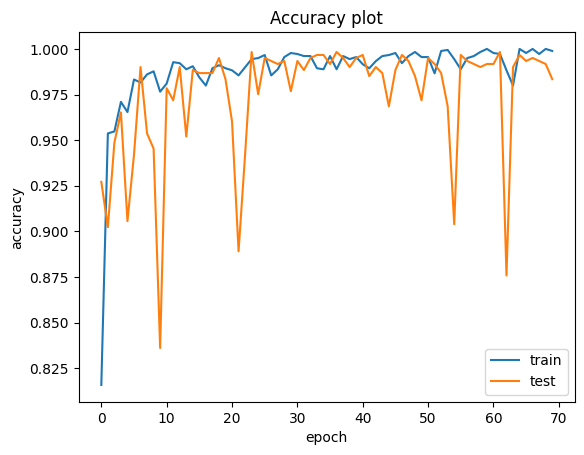

In [16]:

plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.title("Accuracy plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")

Text(0, 0.5, 'loss')

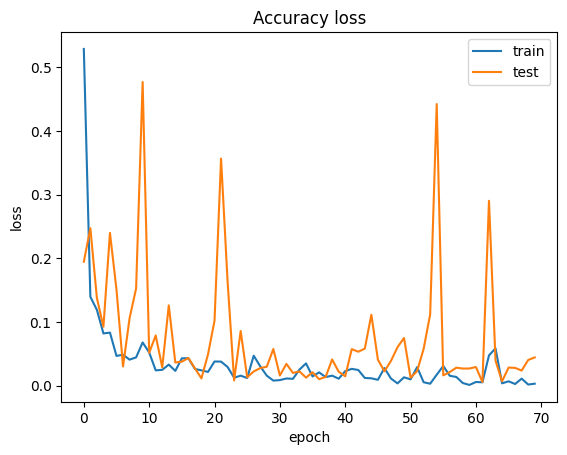

In [17]:
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.title("Accuracy loss")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("loss")

In [18]:
import numpy as np

In [21]:

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.5)

test_data = datagen.flow_from_directory(
    dir2,
    target_size=(224, 224),
    batch_size= 32,
    shuffle=True,
    class_mode='binary',
    subset='validation')


# Get the true labels for the test data
true_labels = test_data.classes

# Get the predicted labels for the test data
predicted_labels = model.predict(test_data)
predicted_labels = np.argmax(predicted_labels, axis=1)

Found 604 images belonging to 2 classes.
19/19 [==============================] - 17s 678ms/step


In [22]:
 #Evaluate the model on the test set
loss, accuracy = model.evaluate(test_data)

# Print the results
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

19/19 [==============================] - 11s 592ms/step - loss: 1.7352 - accuracy: 0.6738
Test Loss: 1.735174536705017
Test Accuracy: 0.6738410592079163


1/1 [==============================] - 0s 158ms/step


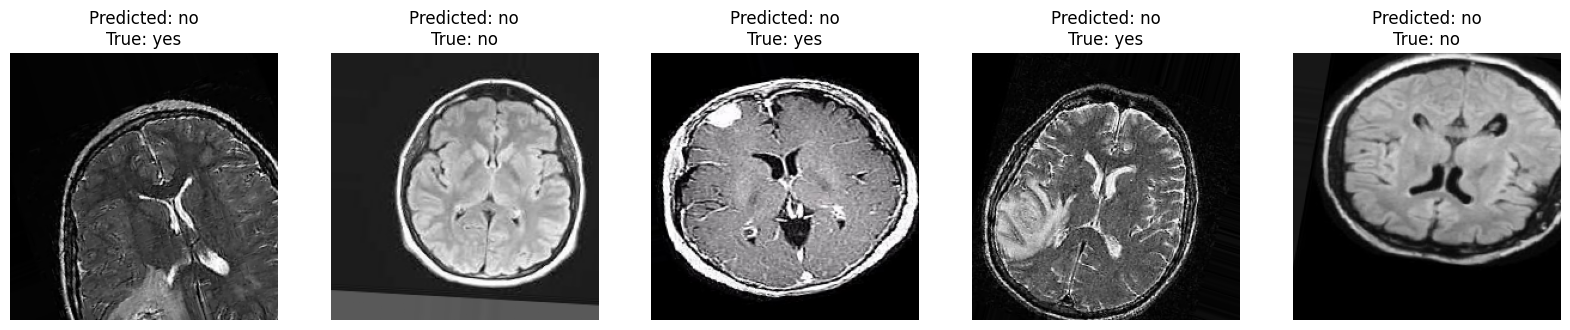

In [23]:

import matplotlib.pyplot as plt
import numpy as np

# Get a few images from the test set
# Get a few images and labels from the test set
num_images = 5
test_data_batch = next(test_data)
test_images = test_data_batch[0]
test_labels = test_data_batch[1]

# Make predictions on the test images
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded labels to class names
class_names = list(test_data.class_indices.keys())
true_labels = np.squeeze(test_labels).astype(int)
true_class_names = [class_names[label] for label in true_labels]
predicted_class_names = [class_names[label] for label in predicted_labels]

# Plot the images with their predicted and true labels
fig, axes = plt.subplots(1, num_images, figsize=(20, 5))

for i, ax in enumerate(axes):
    ax.imshow(test_images[i])
    ax.axis('off')
    ax.set_title(f"Predicted: {predicted_class_names[i]}\nTrue: {true_class_names[i]}")

plt.show()

In [24]:

# Generate the classification report
from sklearn.metrics import classification_report

print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.41      1.00      0.58        13
           1       0.00      0.00      0.00        19

    accuracy                           0.41        32
   macro avg       0.20      0.50      0.29        32
weighted avg       0.17      0.41      0.23        32



In [25]:
# Generate the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[13  0]
 [19  0]]


In [26]:
model.save("./vgg16.h5")
